# A/B Testing

- **Homepage Actions Data**
- **Course Page Actions Data**

## Homepage Actions Data

In this part we investigate whether to implement the new homepage design.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


#### General characteristics about the dataset:

- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [2]:
# total number of actions

df['action'].shape[0]

8188

In [3]:
# number of unique users

df['id'].nunique()

6328

In [4]:
df['id'].groupby(df['group']).nunique()

group
control       3332
experiment    2996
Name: id, dtype: int64

#### What action types are recorded in this dataset?

In [5]:
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

<br>

#### Performing an A/B test to conclude whether the new page design should be implemented.

Formulating the null and alternative hypotheses.

$$ H_0: CTR_{new} - CTR_{old} \leq 0 $$ 
$$ H_1: CTR_{new} - CTR_{old} > 0 $$

In [6]:
# old_ctr
control_df = df[df['group'] == 'control']

old_ctr = control_df[control_df['action'] == 'click']['id'].nunique()/control_df['id'].nunique()
old_ctr

0.2797118847539016

In [7]:
# new_ctr
experiment_df = df[df['group'] == 'experiment']

new_ctr = experiment_df[experiment_df['action'] == 'click']['id'].nunique()/experiment_df['id'].nunique()
new_ctr

0.3097463284379172

In [8]:
obs_diff = new_ctr - old_ctr
obs_diff

0.030034443684015644

In [9]:
diffs = []

for i in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp[b_samp['group'] == 'control']
    experiment_df = b_samp[b_samp['group'] == 'experiment']
    old_ctr = control_df[control_df['action'] == 'click']['id'].nunique()/control_df['id'].nunique()
    new_ctr = experiment_df[experiment_df['action'] == 'click']['id'].nunique()/experiment_df['id'].nunique()
    diffs.append(new_ctr - old_ctr)

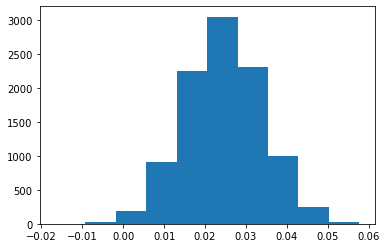

In [10]:
diffs = np.array(diffs)

plt.hist(diffs);

#### Simulating from the null

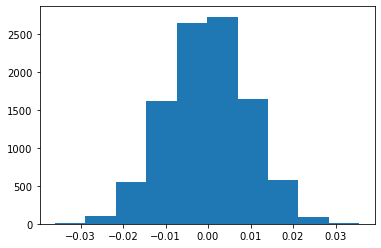

In [11]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)
plt.hist(null_vals);

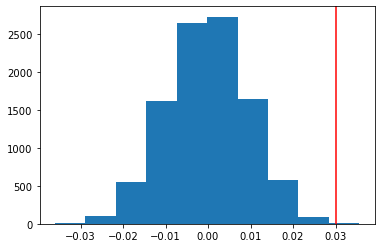

In [12]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='r');

#### Calculating p-value

In [13]:
p_val = (null_vals > obs_diff).mean()
p_val

0.0006

with a p-value of less than **0.01**, which is our type I error rate, it seems unlikely that our statistic is from the null. So based on what we have found we are going to reject the null hypothesis and go with implementing the new page design

## Course Page Actions Data

In this part we will test whether the change on the course overview page should be implemented, based on multiple metrics.

- Enrollment Rate
- Average Classroom Time
- Completion Time

In [14]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [15]:
df['action'].value_counts()

view      3260
enroll     814
Name: action, dtype: int64

<br>

### Enrollment Rate

#### Performing an A/B test to conclude whether the new change on the course overview page should be implemented based on the enrollment rate

Formulating the null and alternative hypotheses
<br>
$$ H_0: CTR_{new} - CTR_{old} \leq 0 $$
$$ H_1: CTR_{new} - CTR_{old} > 0 $$

In [16]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click-through rate (ctr) for control group
old_ctr = control_df.query('action == "enroll"')['id'].nunique()/control_df.query('action == "view"')['id'].nunique()
old_ctr

0.2364438839848676

In [17]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click-through rate (ctr) for control group
new_ctr = experiment_df.query('action == "enroll"')['id'].nunique()/experiment_df.query('action == "view"')['id'].nunique()
new_ctr

0.2668693009118541

In [18]:
# Compute the observed difference in click through rates
obs_diff = new_ctr - old_ctr
obs_diff

0.030425416926986526

In [19]:
# Create a bootstrap sampling distribution for the difference in proportions
diffs = []

for i in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    old_ctr = control_df.query('action == "enroll"')['id'].nunique()/control_df.query('action == "view"')['id'].nunique()
    new_ctr = experiment_df.query('action == "enroll"')['id'].nunique()/experiment_df.query('action == "view"')['id'].nunique()
    diffs.append(new_ctr - old_ctr)

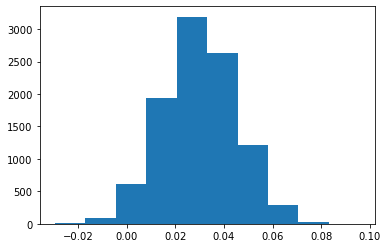

In [20]:
diffs = np.array(diffs)
plt.hist(diffs);

#### Simulating from the null

In [21]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

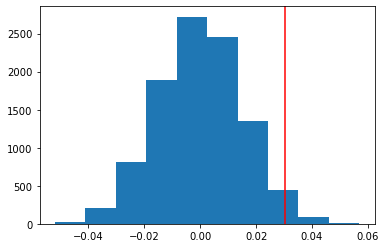

In [22]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='r')

#### Calculating p-value

In [23]:
pval = (null_vals > obs_diff).mean()
pval

0.0203

with a p-value of less than **0.05**, which is our type I error rate, it seems unlikely that our statistic is from the null. Based on what we have found, we have evidence that the enrollment rate for this course increases when using the experimental description on its overview page. Therefore, we should go with implementing the experimental description on the course's overview page.

### Average Classroom Time

#### Performing an A/B test to conclude whether new users spend more time in the classroom after seeing the experimental description in the overview page

Formulating the null and alternative hypotheses
<br>
$$ H_0: Time_{new} - Time_{old} \leq 0 $$
$$ H_1: Time_{new} - Time_{old} > 0 $$

In [24]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [27]:
# average classroom time for control group
control_group = df.query('group == "control"')

c_mean = control_group['total_days'].mean()
c_mean

73.36899038461539

In [28]:
# average classroom time for experiment group
experiment_group = df.query('group == "experiment"')

e_mean = experiment_group['total_days'].mean()
e_mean

74.6715935334873

In [29]:
# compute observed difference in classroom time
obs_diff = e_mean - c_mean
obs_diff

1.3026031488719099

In [30]:
# create sampling distribution of difference in average classroom times with bootstrapping
diffs = []

for i in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_group = b_samp.query('group == "control"')
    experiment_group = b_samp.query('group == "experiment"')
    c_mean = control_group['total_days'].mean()
    e_mean = experiment_group['total_days'].mean()
    diffs.append(e_mean - c_mean)

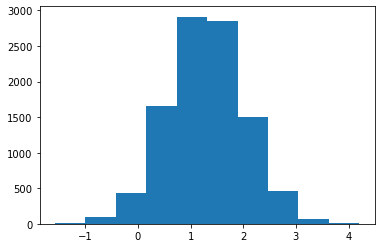

In [31]:
diffs = np.array(diffs)

plt.hist(diffs);

#### Simulating from the null

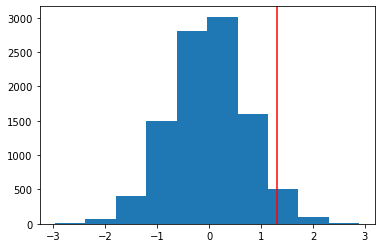

In [32]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='r')

#### Calculating p-value

In [34]:
pval = (null_vals > obs_diff).mean()
pval

0.0395

with a p-value of less than **0.05**, which is our type I error rate, it seems unlikely that our statistic is from the null. Based on what we have found, we have evidence that users spend more time in the classroom after seeing the experimental description on the course overview page. Therefore, we should go with implementing the experimental description on the course's overview page.

### Completion Rate

#### Performing an A/B test to conclude whether the completion rate for this course increases when using the experimental description on the course's overview page

Formulating the null and alternative hypotheses
<br>
$$ H_0: CR_{new} - CR_{old} \leq 0 $$
$$ H_1: CR_{new} - CR_{old} > 0 $$

In [35]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [38]:
# Compute completion rate for control group
control_group = df.query('group == "control"')
c_cr = control_group[control_group['completed'] == True].shape[0]/control_group.shape[0]
c_cr

0.3719951923076923

In [40]:
# Compute completion rate for experiment group
experiment_group = df.query('group == "experiment"')
e_cr = experiment_group[experiment_group['completed'] == True].shape[0]/experiment_group.shape[0]
e_cr

0.3935334872979215

In [41]:
# Compute observable difference 
obs_diff = e_cr - c_cr
obs_diff

0.02153829499022919

In [42]:
# create sampling distribution of difference in completion rates with bootstrapping
diffs = []

for i in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_group = b_samp.query('group == "control"')
    experiment_group = b_samp.query('group == "experiment"')
    c_cr = control_group[control_group['completed'] == True].shape[0]/control_group.shape[0]
    e_cr = experiment_group[experiment_group['completed'] == True].shape[0]/experiment_group.shape[0]
    diffs.append(e_cr - c_cr)

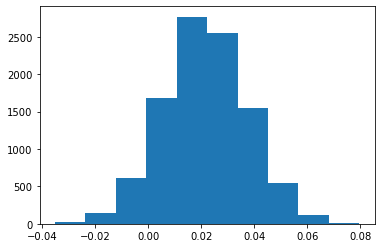

In [43]:
diffs = np.array(diffs)

plt.hist(diffs);

#### Simulating from the null

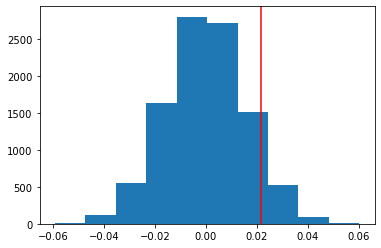

In [44]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

plt.hist(null_vals)
plt.axvline(x=obs_diff, color='r');

#### Calculating p-value

In [45]:
pval = (null_vals > obs_diff).mean()
pval

0.0882

with a p-value of more than **0.05**, which is our type I error rate, it seems likely that our statistic is from the null. Based on what we have found, we have evidence that the completion rate for this course does not increase when using the experimental description on the course's overview page.